# Self-Introduction to Machine Learning and Data Science

Hi, if you're reading this welcome to my first project with Machine Learning and Data Science! I'm currently a second year student at the University of Waterloo majoring in Statistics. This term I'm working as a full-stack developer while doing my best to learn about Data Science, keep up with my online courses and train for a marathon among other things. 
My statistics knowledge while doing this project is from what I've learned from last term's probability course and the empirical studies course I'm currently taking. The Machine Learning Models I do know are in large part learned from the Udemy course I'm taking on ML. 
I have taken two university courses in Python and the empirical studies course I'm taking is expanding my knowledge of R.

I've done enough talking - below is my analysis. 

In [1]:
# Importing libraries
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
np.set_printoptions(threshold=sys.maxsize)
%matplotlib inline

Here we read in the training and testing dataset and assign them.

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
sample_submission =  pd.read_csv('data/gender_submission.csv')
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df_train.info()
print('_'*80)
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________________________________________________


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We notice that the 'Cabin' column is missing in basically 7 out of 9 passenger's information. If you look at some of the values for the column, you'd also notice that passengers occationally have multiple cabins; chances are, they have other people staying in these cabins and who can say which one is actually the residence of the one who rented the rooms. We also don't have a layout of the ship so it would be extremely challenging if not completely useless to draw meaning from these values. I will also be dropping the columns 'Name' and 'Ticket' since neither has apparent significance. It is true that we might be able use people's titles to help our model, but 'Pclass' (Ticket Class), 'SibSp' (# of siblings) and 'Parch' (# of parents) will give us a good indictor of social status and prescence of family onboard.

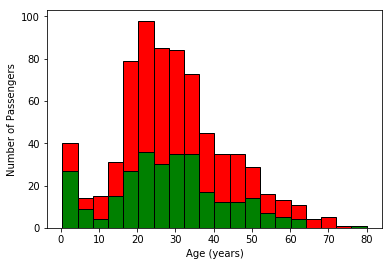

________________________________________________________________________________
Mean:
29.69911764705882
Median:
28.0
Skewness
Age         0.389108
Survived    0.382945
dtype: float64


In [4]:
df_train.drop(['Name','Ticket','Cabin'], axis=1, inplace = True)
df_test.drop(['Name','Ticket','Cabin'], axis=1, inplace = True)

known_ages = df_train[['Age','Survived']].dropna()
survived = known_ages.loc[known_ages['Survived']==1]['Age']
perished = known_ages.loc[known_ages['Survived']==0]['Age']
plt.hist([survived,perished], bins=20, stacked=True, color=['green','red'], ec='black')
plt.xlabel('Age (years)')
plt.ylabel('Number of Passengers')
plt.show()

print('_'*80,'Mean:',known_ages['Age'].mean(),'Median:', known_ages['Age'].median(),'Skewness',known_ages.skew(), sep='\n')

As seen above, there isn't much difference between the median and mean, so for simplicity we will use mean imputation since we would be deleting a lot of data if we were to instead drop passengers' ages. 

In [5]:
imptr=SimpleImputer(strategy='mean')
imptr=imptr.fit(df_train[['Age']])
df_train[['Age']] = imptr.transform(df_train[['Age']])
# Confirm previous NaN is now our mean
df_train.head(6) 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
5,6,0,3,male,29.699118,0,0,8.4583,Q


In [6]:
imp = SimpleImputer(strategy="most_frequent")
imp=imp.fit(df_train[['Embarked']])
df_train[['Embarked']] = imp.transform(df_train[['Embarked']])
df_train[['PassengerId','Embarked']].groupby('Embarked').count()

,PassengerId
Embarked,
C,168
Q,77
S,646


The above count indeed sums to 891.

Next, let's examine our categorical variables: Sex and Embarked. Let's visualize the survival of men and women who embarked from the different ports.

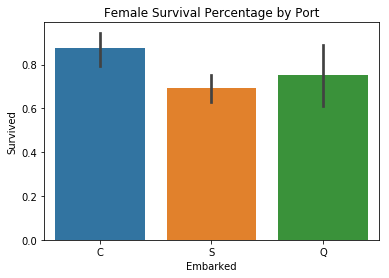

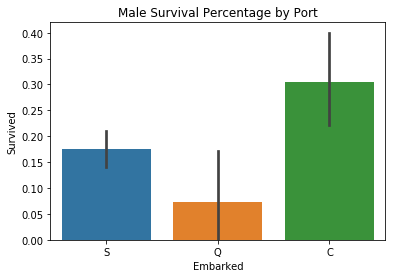

In [7]:
Female_Embarked_data=df_train.loc[df_train['Sex']=='female'][['Embarked','Survived']].dropna()
Male_Embarked_data=df_train.loc[df_train['Sex']=='male'][['Embarked','Survived']].dropna()
port_ind = np.arange(3)
width = 0.4


gF = sns.barplot(x="Embarked", y="Survived", data=Female_Embarked_data).set_title('Female Survival Percentage by Port')
plt.show()
gM = sns.barplot(x="Embarked", y="Survived", data=Male_Embarked_data).set_title('Male Survival Percentage by Port')
plt.show()

In [24]:
lblencoder = LabelEncoder()
ohe = OneHotEncoder(categorical_features= [-1])


ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), [3,8])])#3,8

x = ct.fit_transform(df_train)[:,1:4]


df_train['Sex'] = x[:,0]
df_train['Embarked'] = x[:,1:]

'''
x = ct.fit_transform(df_train)#[:,1:4]


df_train['Sex'] = x[:,0]
df_train['Embarked'] = x[:,1:2]
df_train['Embarked2'] = x[:,2:3]
'''

C:\Users\dex78\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 1., 0., 1.],
       [1., 0., 1., 0.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [1., 0., 0., 1.],
       [1., 0., 1., 0.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [1., 0., 0., 1.],
       [1., 0., 1., 0.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [1., 0., 0., 1.],
       [0., 1., 0., 1.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [0., 1., 1., 0.],
       [0., 1., 0., 1.],
       [1., 0., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 1., 0.],
       [0., 1., 0., 1.],
       [0., 1., 1., 0.],
       [0., 1., 0., 1.],
       [1., 0., 0., 1.],
       [1., 0., 1., 0.],


C:\Users\dex78\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dex78\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
C:\Users\dex78\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


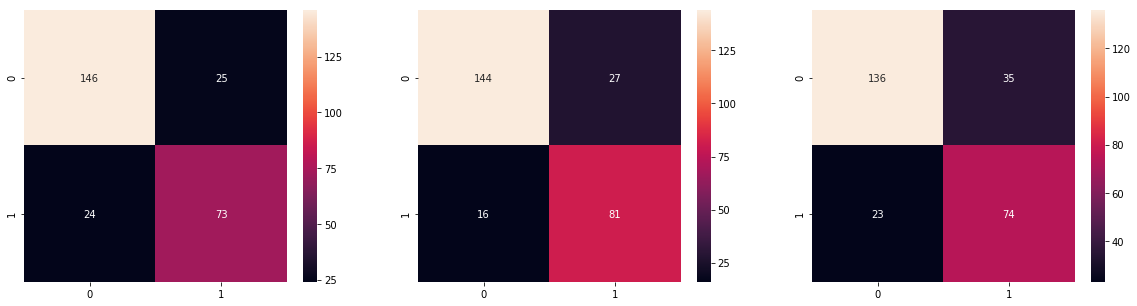

In [9]:
# Import packages for fitting and measuring accuracy
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(df_train.drop(columns = 'Survived'), df_train[['Survived']], test_size=0.3)

ABClassifier = AdaBoostClassifier(n_estimators=500)
ABClassifier.fit(x_train, y_train)
ABC_survival_predictions = ABClassifier.predict(x_test)

RFClassifier = RandomForestClassifier(n_estimators = 50)
RFClassifier.fit(x_train, y_train)
RFC_survival_predictions = RFClassifier.predict(x_test)

GNB = GaussianNB()
GNB.fit(x_train, y_train)
GNB_survival_predictions = GNB.predict(x_test)

# Examine how confusion matrices can help with understanding the performance of the model.
ABC_cm = confusion_matrix(y_test, ABC_survival_predictions)
RFC_cm = confusion_matrix(y_test, RFC_survival_predictions)
GNB_cm = confusion_matrix(y_test, GNB_survival_predictions)

plt.rcParams['figure.figsize'] = [20, 5]
fig, ax = plt.subplots(1,3)
sns.heatmap(ABC_cm, annot=True, fmt='g', ax=ax[0])
sns.heatmap(RFC_cm, annot=True, fmt='g', ax=ax[1])
sns.heatmap(GNB_cm, annot=True, fmt='g', ax=ax[2])

In [10]:
a_score = round(accuracy_score(y_test, ABC_survival_predictions), 4)
r_score = round(accuracy_score(y_test, RFC_survival_predictions), 4)
g_score = round(accuracy_score(y_test, GNB_survival_predictions), 4)

print('Classifier Accuracy Scores')
print('\t'.join(['AdaBoost','Random Forest', 'Gaussian Naive Bayes']))
print('\t\t'.join([str(a_score), str(r_score), str(g_score)]))

Classifier Accuracy Scores
AdaBoost	Random Forest	Gaussian Naive Bayes
0.8172		0.8396		0.7836


The three classifiers are somewhat comparable, but the clear winner here is Random Forest. Random Forest being an ensemble learning algorithm has fairly good results given there's enough data to average out the classifiers operating on small subsets of the data to create a robust model. This can be seen here where it's outperforming AdaBoost which I hear does very well in certain situations and Naive Bayes which make good use of the relationship between data points and their respective classification using Bayes' theorem. 

I admit because AdaBoost uses other ML algorithms (which can be modified in the constructor), I likely did not use it to its full potential. You may also notice I didn't examine a large number of the variables - if they weren't very close to the normal distribution why should you pursue a Gaussian NB classifier. 

The reason for this is mostly to compare some different algorithms. It was also to get myself accustomed to the process of examining, cleaning and analyzing the data prior to the fairly simple task of training the models. I also wanted to use classifiers whose algorithms I am familiar with.

In [11]:
# Verify submission looks follows same format as sample
sample_submission.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [13]:
#submission = RFClassifier.predict(df_test)

#submission.head(10)
#df_test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1.0,22.000000,1,0,7.2500,0.0
1,2,1,1,0.0,38.000000,1,0,71.2833,1.0
2,3,1,3,0.0,26.000000,0,0,7.9250,0.0
3,4,1,1,0.0,35.000000,1,0,53.1000,0.0
4,5,0,3,1.0,35.000000,0,0,8.0500,0.0
5,6,0,3,1.0,29.699118,0,0,8.4583,0.0
6,7,0,1,1.0,54.000000,0,0,51.8625,0.0
7,8,0,3,1.0,2.000000,3,1,21.0750,0.0
8,9,1,3,0.0,27.000000,0,2,11.1333,0.0
9,10,1,2,0.0,14.000000,1,0,30.0708,1.0
